# Capstone Project 1: New York City Taxi Fare Prediction

In big cities such as New York City, a huge number of taxi rides is taken per day. 
As the popularity of app-based vehicle hiring services grows, accurate prediction of taxi fare is essential for 
enhancing customers’ satisfaction, since it is given as upfront data to the customers. 
There are many factors that should be considered such as the pickup time, pickup or dropoff locations, etc. in predicting taxi fare. 
Providing accurate taxi fare at a specific time enables both drivers and customers to decide whether to select the rides or not. 
The goal of this project is developing a Machine Learning (ML) based model to predict the fare amount for a taxi ride in New York City while some data such as the pickup and dropoff locations are given. 

Predicting accurate taxi fares yields better results for taxi cab and ridesharing companies such as Uber, Lyft, etc. 
Also, this project can be used in traffic congestion prediction and autonomous vehicle research to develop accurate traffic models and choose the fastest and less congested routes. 

The data from a Kaggle competition is used for this project
(https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview).

The dataset for this project includes the features explained below:

   * pickup_datetime - timestamp value indicating when the taxi ride started.
    
   * pickup_longitude - float for longitude coordinate of where the taxi ride started.
    
   * pickup_latitude - float for latitude coordinate of where the taxi ride started.
    
   * dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
    
   * dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
    
   * passenger_count -integer indicating the number of passengers in the taxi ride.

During the modeling phase of the project, these features can be extended. 

Target: 

   * fare_amount - dollar amount of the cost of the taxi ride. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

Read limited number of rows from dataset due to low memory. For this project, 6 million rows are read from 55 million available rows.

In [2]:
train_file = pd.read_csv('/Users/mehrnaz/Desktop/SpringBoard/Assignment/Capstone_Project_1/Data_wrangling/train.csv', nrows = 6000000)

## Part1: Data Wrangling

First try to see:
   * How train_file dataframe looks like. 
   * Shape of train_file. 
   * Statistics of the features

In [3]:
#Check data type of each column
train_file.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
#Let see how dataframe looks like 
train_file.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
# check statistics of the features
train_file.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,6.000000e+06,6.000000e+06,6.000000e+06,5.999961e+06,5.999961e+06,6.000000e+06
mean,1.134049e+01,-7.251142e+01,3.992406e+01,-7.251060e+01,3.992049e+01,1.684645e+00
std,9.810989e+00,1.280236e+01,9.022813e+00,1.285400e+01,9.367604e+00,1.327794e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398182e+01,4.075263e+01,-7.398016e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.344459e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [6]:
#check the number of rows and columns of 'train_file' dataframe
train_file.shape

(6000000, 8)

Based on the above information, following steps should be performed:

* Check if there is any NAN and drop them

* Check the target column:

    * E.g. negative fare_amount does not make sense

In [7]:
#check how manay NANs exsit in dataset
train_file.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    39
dropoff_latitude     39
passenger_count       0
dtype: int64

In [8]:
#Remove NAN from the file 
train_file = train_file.dropna()

In [9]:
#Check the number of rows and columns after removing NAN
train_file.shape

(5999961, 8)

In [10]:
#Check if there is negative value for fare_amount and how many
Counter(train_file['fare_amount'] <= 0)

Counter({False: 5999539, True: 422})

In [11]:
#Remove rows with negative and zero values for 'fare_amount'
train_file = train_file.drop(train_file[train_file['fare_amount'] <= 0].index, axis=0)

In [12]:
#Check the number of rows and columns after removing 'fare_amount' with negative value
train_file.shape

(5999539, 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cc10150>]],
      dtype=object)

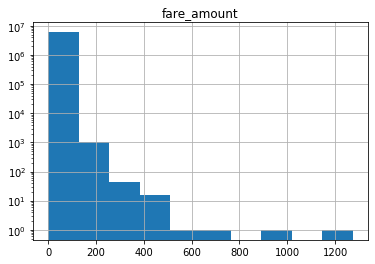

In [13]:
#Plot histogram for 'fare_amount'
train_file.hist(column='fare_amount', log=True)

Based on the histogram for 'fare_amount', the price range between (0,200) dollar makes sense.

Let see how many 'fare_amount' greater than 200 dollar exist.

In [14]:
#check if there is 'fare_amount' greater than $200 
Counter(train_file['fare_amount'] > 200)

Counter({False: 5999346, True: 193})

In [15]:
#Does not make sense to have 'fare_amount' greater than $200, so consider them as outlier and remove them
train_file = train_file.drop(train_file[train_file['fare_amount'] > 200].index, axis=0)
train_file.shape

(5999346, 8)

Next analyzing the problem features.

In order to analyze latitude and longtitude columns, coordinates of NYC should be considered as boundries.

Googled to find the latitude and longtitude range for NYC:
* The NYC's latitude is in the range of (40, 42) 

* The NYC longtitude is in the range of (-76, -71) 

I have considered a slightly wider range for latitude and longtitude to be more inclusive.

In [16]:
#check to see if there is an outlier for pickup_longitude
train_file['pickup_longitude'].max()

3439.425565

In [17]:
#check to see if there is an outlier for pickup_latitude
train_file['pickup_latitude'].max()

3344.459268

In [18]:
#check to see if there is an outlier for pickup_longitude
train_file['pickup_longitude'].min()

-3426.60895

In [19]:
#check to see if there is an outlier for pickup_latitude
train_file['pickup_latitude'].min()

-3488.079513

In [20]:
#check to see if there is an outlier for dropoff_longitude
train_file['dropoff_longitude'].max()

3457.62235

In [21]:
#check to see if there is an outlier for dropoff_longitude
train_file['dropoff_longitude'].min()

-3412.6530869999997

In [22]:
#check to see if there is an outlier for dropoff_latitude
train_file['dropoff_latitude'].max()

3345.9173530000003

In [23]:
#check to see if there is an outlier for dropoff_latitude
train_file['dropoff_latitude'].min()

-3488.079513

In [24]:
#'pickup_latitude' should be in the range of (40, 42)
train_file = train_file[train_file['pickup_latitude'].between(40, 42)]
train_file.shape

(5881098, 8)

In [25]:
#'pickup_longitude' should be in the range of (-76, -71)
train_file = train_file[train_file['pickup_longitude'].between(-76,-71)]
train_file.shape

(5880097, 8)

In [26]:
#'dropoff_latitude' should be in the range of (40, 42)
train_file = train_file[train_file['dropoff_latitude'].between(40, 42)]
train_file.shape

(5874464, 8)

In [27]:
#'dropoff_longitude' should be in the range of (-76, -71)
train_file = train_file[train_file['dropoff_longitude'].between(-76,-71)]
train_file.shape

(5873769, 8)

The other column that should be cleaned up is the 'passenger_count'.

Let's find if there is an outlier for this feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d8e9fd0>]],
      dtype=object)

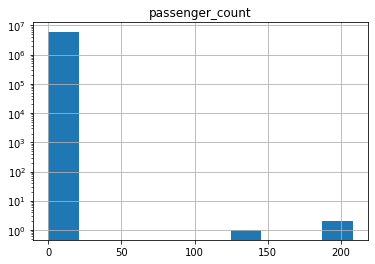

In [28]:
train_file.hist(column='passenger_count', log=True)

In [29]:
#Check if there is outlier for passenger_count
train_file['passenger_count'].max()

208

Maximum number of passengers is 208 that does not make sense for the number of seats on a taxi cab.
The maxminum allowed passengers for an SUV or a Van is 6. So, 6 is considered as an upperbound for the number of passengers in each ride.

In [30]:
#Does not make sense to have 'passenger_count' greater than 6 or less than 1, so consider them as bounds and remove the data out of bounds.
train_file = train_file[train_file['passenger_count'].between(1, 6)]
train_file.shape

(5853045, 8)

In the next step, new features will be created based on the available data to see whether these features affect the fare_amount or not.
    * Distance between pickup and dropoff location should be calculated.
    * The date and time of pickup. 
    

Haversine formula is employed to calculate the distance between pickup and dropoff locations based on longitude and latitude. 

The Haversine formula is (https://en.wikipedia.org/wiki/Haversine_formula):

distance = 2 * r * arcsin(sqrt(sin((latitude2 - latitude1) / 2.0)^2 + cos(latitude1) * cos(latitude2) * sin((longitude2 - longitude1) / 2.0)^2))
    

In [31]:
#Calculate the distance based on Haversine formula
def distance(lat1, lat2, lon1, lon2):
    # radians which converts from degrees to radians.   
    lat1 = np.radians(lat1) 
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1) 
    lon2 = np.radians(lon2) 
        
    # Haversine formulation  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
       
    # calculate the result 
    dis = c * r
    return dis

def creat_new_cloumn(df):
    data = [df]
    for row in data:
        row['distance'] = distance(row['pickup_latitude'], row['dropoff_latitude'], row['pickup_longitude'], row['dropoff_longitude'])
    return row['distance'] 
creat_new_cloumn(train_file)

0           1.030764
1           8.450134
2           1.389525
3           2.799270
4           1.999157
             ...    
5999995     1.754230
5999996     1.170740
5999997    10.236437
5999998     3.871053
5999999     1.327775
Name: distance, Length: 5853045, dtype: float64

In [32]:
train_file.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [33]:
train_file.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance             float64
dtype: object

In [34]:
#Check if there are ouliers for distance
train_file['distance'].max()

237.35211613786055

In [35]:
#Check if there are ouliers for distance
train_file['distance'].min()

0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d38d890>]],
      dtype=object)

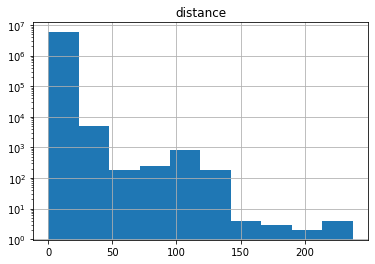

In [36]:
train_file.hist(column='distance', log=True)

In [37]:
#Does not make sense to have 'distance' greater than 150km, so consider them as outlier and remove them
train_file = train_file.drop(train_file[train_file['distance'] > 150].index, axis=0)
train_file.shape

(5853033, 9)

In [38]:
# Zero 'distance' does not make sense, so consider them as outlier and remove them
train_file = train_file.drop(train_file[train_file['distance'] == 0].index, axis=0)
train_file.shape

(5790599, 9)

Since the 'key' and 'pickup_datetime' columns are the same, change the type of the key column to datetime type and then, create new year, month, day, dayofweek, and hour columns.
Finally, remove the 'key' column to get rid of duplicated data (having 'pickup_datetime' is enough).

In [39]:
#convert the 'key' column to datetime 
train_file['key'] = pd.to_datetime(train_file['key'])
train_file.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [40]:
train_file.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime              object
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
distance                    float64
dtype: object

In [41]:
#Add 'year' column to dataframe
train_file['year'] = train_file['key'].dt.year

In [42]:
#Add 'year' column to dataframe
train_file['month'] = train_file['key'].dt.month

In [43]:
#Add 'year' column to dataframe
train_file['dayofweek'] = train_file['key'].dt.dayofweek

In [44]:
#Add 'year' column to dataframe
train_file['day'] = train_file['key'].dt.day

In [45]:
#Add 'year' column to dataframe
train_file['hour'] = train_file['key'].dt.hour

In [46]:
train_file.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,15,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,5,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,18,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,21,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,9,7


In [47]:
#Make sure only data for recent years 2005 to 2020 are considered
train_file = train_file[train_file['year'].between(2005, 2020)]
train_file.shape

(5790599, 14)

In [48]:
#Remove 'key' column to remove duplicated data
train_file = train_file.drop('key', axis=1)

In [49]:
train_file.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,15,17
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,5,16
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,18,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,21,4
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,9,7
